# Lab 4

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-4](https://yuanyuyuan.github.io/itcm/lab-4.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 11/20(Wed.)**

In [1]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 1.  Finite Difference
---

### Part 0.

#### Import necessary libraries. Note that diags library from scipy is used to construct the differentiation matrix below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

---

### Part 1. 

#### Given a function $u(x)$ which we want to find its derivative with numerical methods.

#### Consider a uniform grid partitioning $x$ into $\{x_1, x_2, \dots, x_n\}$ with grid size $\Delta x=x_{j+1}-x_j, j\in \{1, 2, \dots, n\}$, and a set of corresponding data values $U=\{U_1, U_2, \dots, U_n\}$, where 
#### $$U_{j+k} = u(x_j + k \Delta x) = u(x_{j+k}), j\in \{1, 2, \dots, n\}.$$

#### We want to use one-sided finite-difference formula 

#### $$\alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}$$

#### to approximate the derivative of $u$ at all the points $x_j, j\in \{1, 2, \dots, n\}$, that is

#### $$u'(x_j) \approx W_j \triangleq \alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}.$$

---

#### Part 1.1

Find the coefficients $\alpha_j$ for $j=1,2,3$ which make the stencil above accurate for as high degree polynomials as possible.

Write down your derivation in detail with Markdown/LaTeX.

Applying Taylor's theorem for a smooth function $u$, we have $U_{j+1} = u(x_j)+u'(x_j)\Delta x+\frac{u''(x_j)}{2}(\Delta x)^2+O((\Delta x)^3)$ and $U_{j+2} = u(x_j)+2u'(x_j)\Delta x+2u''(x_j)(\Delta x)^2+O((\Delta x)^3)$. By choosing $(\alpha_1,\alpha_2,\alpha_3) = (-\frac{3}{2\Delta x},\frac{2}{\Delta x}, -\frac{1}{2\Delta x})$,

$$ \alpha_1 U_j+\alpha_2 U_{j+1}+\alpha_3 U_{j+2} =\left(-\frac{3u(x_j)}{2\Delta x}\right)+\left(\frac{2u(x_j)}{\Delta x}+2u'(x_j)+u''(x_j)\Delta x+O((\Delta x)^2)\right)+\left(-\frac{u(x_j)}{2\Delta x}-u'(x_j)-u''(x_j)\Delta x+O((\Delta x)^2)\right). $$
Hence, $\alpha_1 U_j+\alpha_2 U_{j+1}+\alpha_3 U_{j+2}= u'(x_j)+O(\Delta x)$. 

#### Part 1.2

Fill in the tuple variable `alpha` of lenght 3 with your answer above. (Suppose $\Delta x=1$)

In [3]:
# Hint: alpha = [value of alpha_1, value of alpha_2, value of alpha_3]
# ===== 請實做程式 =====
alpha = (-3/2,2,-1/2)
# ====================

In [4]:
print('My alpha =', alpha)

My alpha = (-1.5, 2, -0.5)


---

### Part 2.

#### Suppose we use the finite-difference formula above to approximate and assume the problem is periodic, i.e. take $U_0=U_n$, $U_1=U_{n+1}$, and so on. 

#### Find the differentiation matrix $D$ so that the numerical differentiation problem can be represented as a matrix-vector multiplication $W \triangleq DU$, where $D \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n}$, and $W \in \mathbb{R}^n$.

---

#### Part 2.1

Complete the following function to construct the desired differentiation matrix under the __periodic boundary condition__ with given number of partition $n$, coefficients of 3-point finite-difference formula $\alpha$, and mesh size $\Delta x$.

In [5]:
def construct_differentiation_matrix(n, alpha, delta_x):
    ''' Construct
    Parameters
    ----------
    n : int
        number of partition
    alpha : tuple of length 3
       alpha = (𝛼1, 𝛼2, 𝛼3)
    delta_x : float
        mesh size
        
    Returns
    -------
    D : scipy.sparse.diags
    '''
    # ===== 請實做程式 =====
    D = [
        alpha[0] * np.ones(n),
        alpha[1] * np.ones(n-1),
        alpha[2] * np.ones(n-2)
    ]
    D = diags(D, offsets=[0, 1, 2])
    D /= delta_x
    D = D.tolil()
    D[n-2,0] = alpha[2]
    D[n-1,0] = alpha[1]
    D[n-1,1] = alpha[2]
    # ====================
    return D

#### Part 2.2

Print and check your implementation.

In [6]:
print("For n = 8 and mesh size 1, D in dense form is")
sparse_D = construct_differentiation_matrix(8, alpha, 1)
dense_D = sparse_D.toarray()
print(dense_D)

For n = 8 and mesh size 1, D in dense form is
[[-1.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -1.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -1.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -1.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -1.5  2.  -0.5]
 [-0.5  0.   0.   0.   0.   0.  -1.5  2. ]
 [ 2.  -0.5  0.   0.   0.   0.   0.  -1.5]]


---

### Part 3.


#### Take $u(x)=e^{\sin x}$ on the domain $[-\pi, \pi]$.  Find the finite difference approximation $W$ for $\{u'(x_j)\}^{n}_{j=1}$ for various values of $n=2^{k}$, $k=3,4,\dots,10$, and analyze the errors.

---

#### Part 3.1

Define the functinos $u$ and $u'(x)$.

In [76]:
def u(x):
    # ===== 請實做程式 =====
    return np.exp(np.sin(x))
    # ====================

def d_u(x):
    # ===== 請實做程式 =====
    return np.cos(x)*np.exp(np.sin(x))
    # ====================

Plot and check the functions

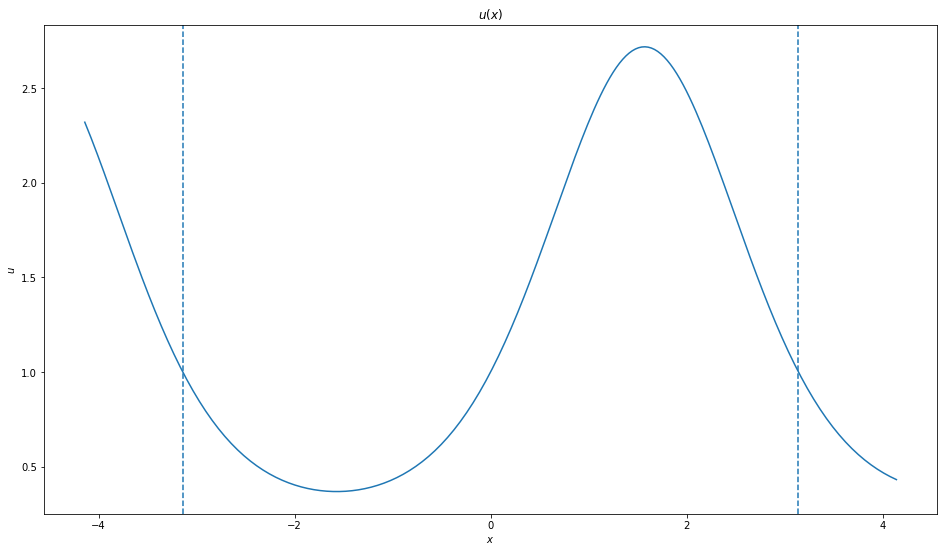

In [77]:
x_range = np.linspace(-np.pi-1, np.pi+1, 2**8)
plt.figure(figsize=(16, 9))
plt.plot(x_range, u(x_range))
plt.axvline(x=np.pi, linestyle='--')
plt.axvline(x=-np.pi, linestyle='--')
plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title(r'$u(x)$')
plt.show()

#### Part 3.2

Plot the $u'$ and $W$ together for each point $x_j, j \in \{1, 2, \dots, n\}$ with $n=2^k, k\in \{3, 4, \dots, 10\}$. Note that there're total 8 figures to be plotted. And you need to compute the error, display them in the plots, and store them into the list variable `error_list` for further analysis below.

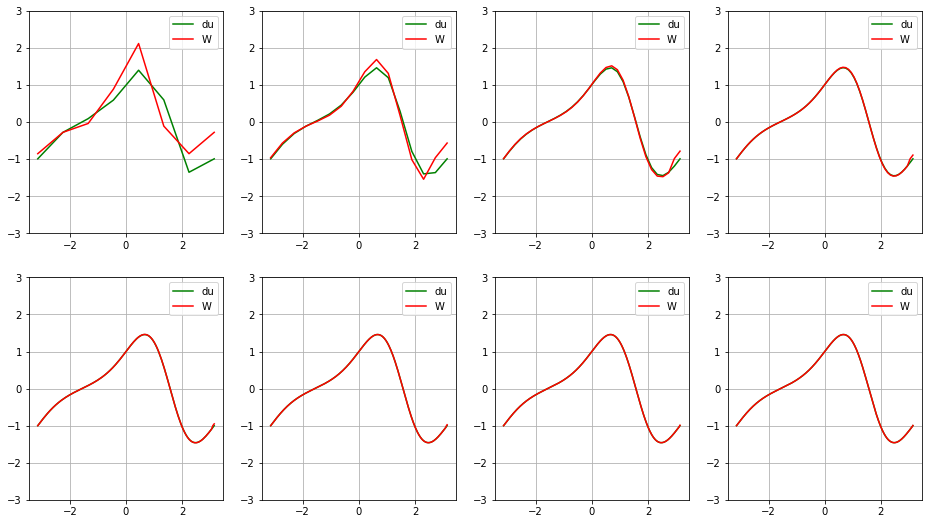

In [102]:
error_list = []
pts_list = []
fig, axes = plt.subplots(2, 4, figsize=(16,9))
for idx, ax in enumerate(axes.flatten()):
    '''Hints: 
    For each case in this for loop, you may follow the steps below
        1. Use idx to set k and n.
        2. Prepare n partition points of the domain.
        3. Construct D.
        4. Find u', U, and W. 
        5. Compute the error between u' and W.
        6. Append the error into error_list.
        7. Use ax to plot u', W with proper labels, title
        8. Enable legend to show the labels of curves.
        9. To make the plots more readable, set a consistent range of y-axis e.g. ax.set_ylim([-3, 3])
    '''
    # ===== 請實做程式 =====
    k = 3+idx
    n = 2**k
    
    dx = 2*np.pi/(n-1)
    pts = np.linspace(-np.pi,np.pi,n)
    
    sparse_D = construct_differentiation_matrix(n, alpha, dx)
    dense_D = sparse_D.toarray()
    
    u1 = d_u(pts)
    U = u(pts)
    W = dense_D @ U
    W[-2] = W[0]
    W[-1] = W[1]
    
    error = np.abs(W-u1)
    
    error_list.append(error)
    pts_list.append(pts)
    
    ax.plot(pts,u1,'g',label = 'du')
    ax.plot(pts,W,'r',label = 'W')
    ax.set_ylim([-3, 3])
    ax.grid(True)
    ax.legend()
    # ====================

Plot the `error_list` with respect to $k=3, 4, \dots, 10$ in log scale to show the error behavior.

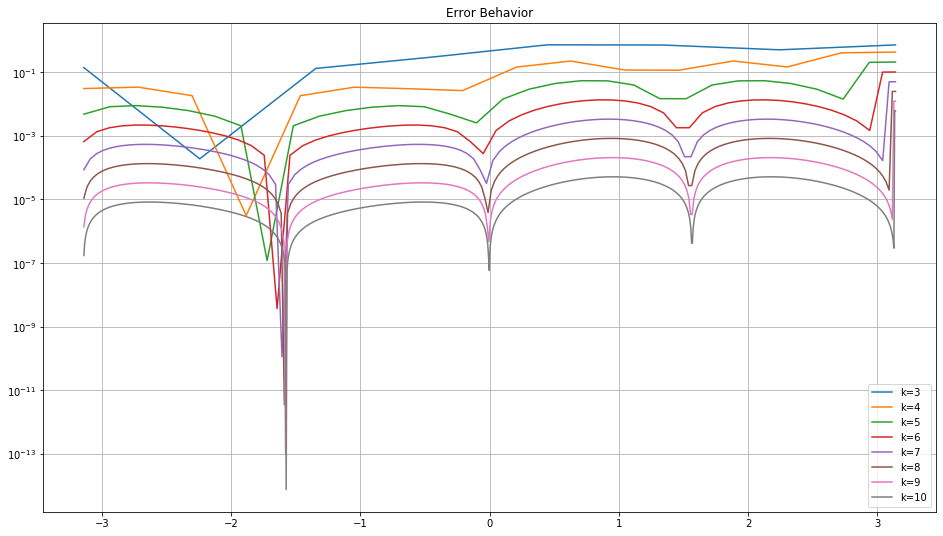

In [105]:
# ===== 請實做程式 =====
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot( pts_list[0], error_list[0], label='k=3')
ax.plot( pts_list[1], error_list[1], label='k=4')
ax.plot( pts_list[2], error_list[2], label='k=5')
ax.plot( pts_list[3], error_list[3], label='k=6')
ax.plot( pts_list[4], error_list[4], label='k=7')
ax.plot( pts_list[5], error_list[5], label='k=8')
ax.plot( pts_list[6], error_list[6], label='k=9')
ax.plot( pts_list[7], error_list[7], label='k=10')

ax.set_title(r'Error Behavior')
plt.legend(loc='lower right')
ax.set_yscale('log')
ax.grid(True)
plt.show()
# ====================

#### Part 3.3

From the figure above, what rates of convergence do you observe as $\Delta x \to 0$?

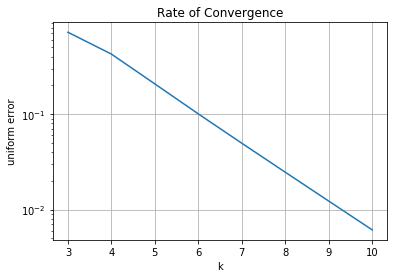

In [125]:
max_list = []
for i in range(len(error_list)):
    max_list.append(np.max(error_list[i]))
k = np.arange(3,11)

plt.plot(k,max_list)
plt.title(r'Rate of Convergence')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('uniform error')
plt.grid(True)
plt.show()

By taking the maximum of error_list$[i]$ for all $i$, the uniform error has a line in log-scale as the previous plot shows. Hence, the rate of convergence is linear as $\Delta x\to 0$. 